In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
dataset = 'https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset'

In [5]:
od.download(dataset)

Skipping, found downloaded files in ".\loan-approval-prediction-dataset" (use force=True to force download)


In [6]:
import os

In [7]:
data_path = './loan-approval-prediction-dataset'

In [8]:
os.listdir(data_path)

['.ipynb_checkpoints', 'loan_approval_dataset.csv']

In [9]:
loan_df = pd.read_csv ('loan_approval_dataset.csv')

In [10]:
loan_df.columns = loan_df.columns.str.strip()
loan_df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [11]:
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
loan_df.shape

(4269, 13)

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [15]:
print(loan_df['education'].unique())

[' Graduate' ' Not Graduate']


In [16]:
print(loan_df['self_employed'].unique())

[' No' ' Yes']


In [17]:
print(loan_df['loan_status'].unique())

[' Approved' ' Rejected']


In [18]:
loan_df['education'] = loan_df['education'].str.strip()

In [19]:
loan_df['self_employed'] = loan_df['self_employed'].str.strip()

In [20]:
loan_df['loan_status'] = loan_df['loan_status'].str.strip()

In [21]:
education_map = {'Graduate': 1, 'Not Graduate': 0}
loan_df['education'] = loan_df['education'].map(education_map)


In [22]:
print(loan_df['education'].unique())

[1 0]


In [23]:
selfemp_map = {'Yes': 1, 'No': 0}
loan_df['self_employed'] = loan_df['self_employed'].map(selfemp_map)
loanstat_map = {'Approved': 1, 'Rejected': 0}
loan_df['loan_status'] = loan_df['loan_status'].map(loanstat_map)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [24]:
loan_df.dtypes

loan_id                     int64
no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

In [36]:
loan_df.describe()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2135.000000,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1232.498479,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,1.000000,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1068.000000,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,2135.000000,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,3202.000000,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,4269.000000,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


In [40]:
pd.crosstab(loan_df['education'],loan_df['loan_status'], margins = True)

loan_status,0,1,All
education,,,
0,808,1317,2125
1,805,1339,2144
All,1613,2656,4269


In [42]:
pd.crosstab(loan_df['self_employed'],loan_df['loan_status'], margins = True)

loan_status,0,1,All
self_employed,,,
0,801,1318,2119
1,812,1338,2150
All,1613,2656,4269


<Axes: >

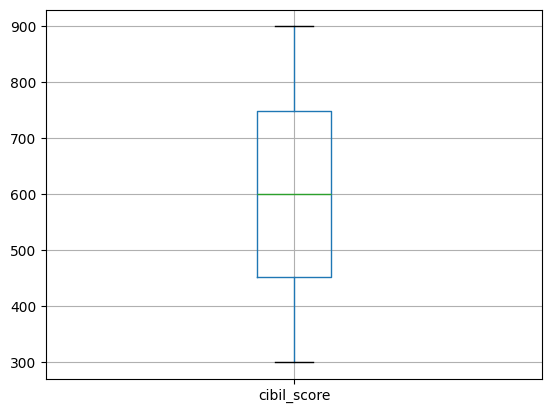

In [29]:
loan_df.boxplot(column= 'cibil_score')

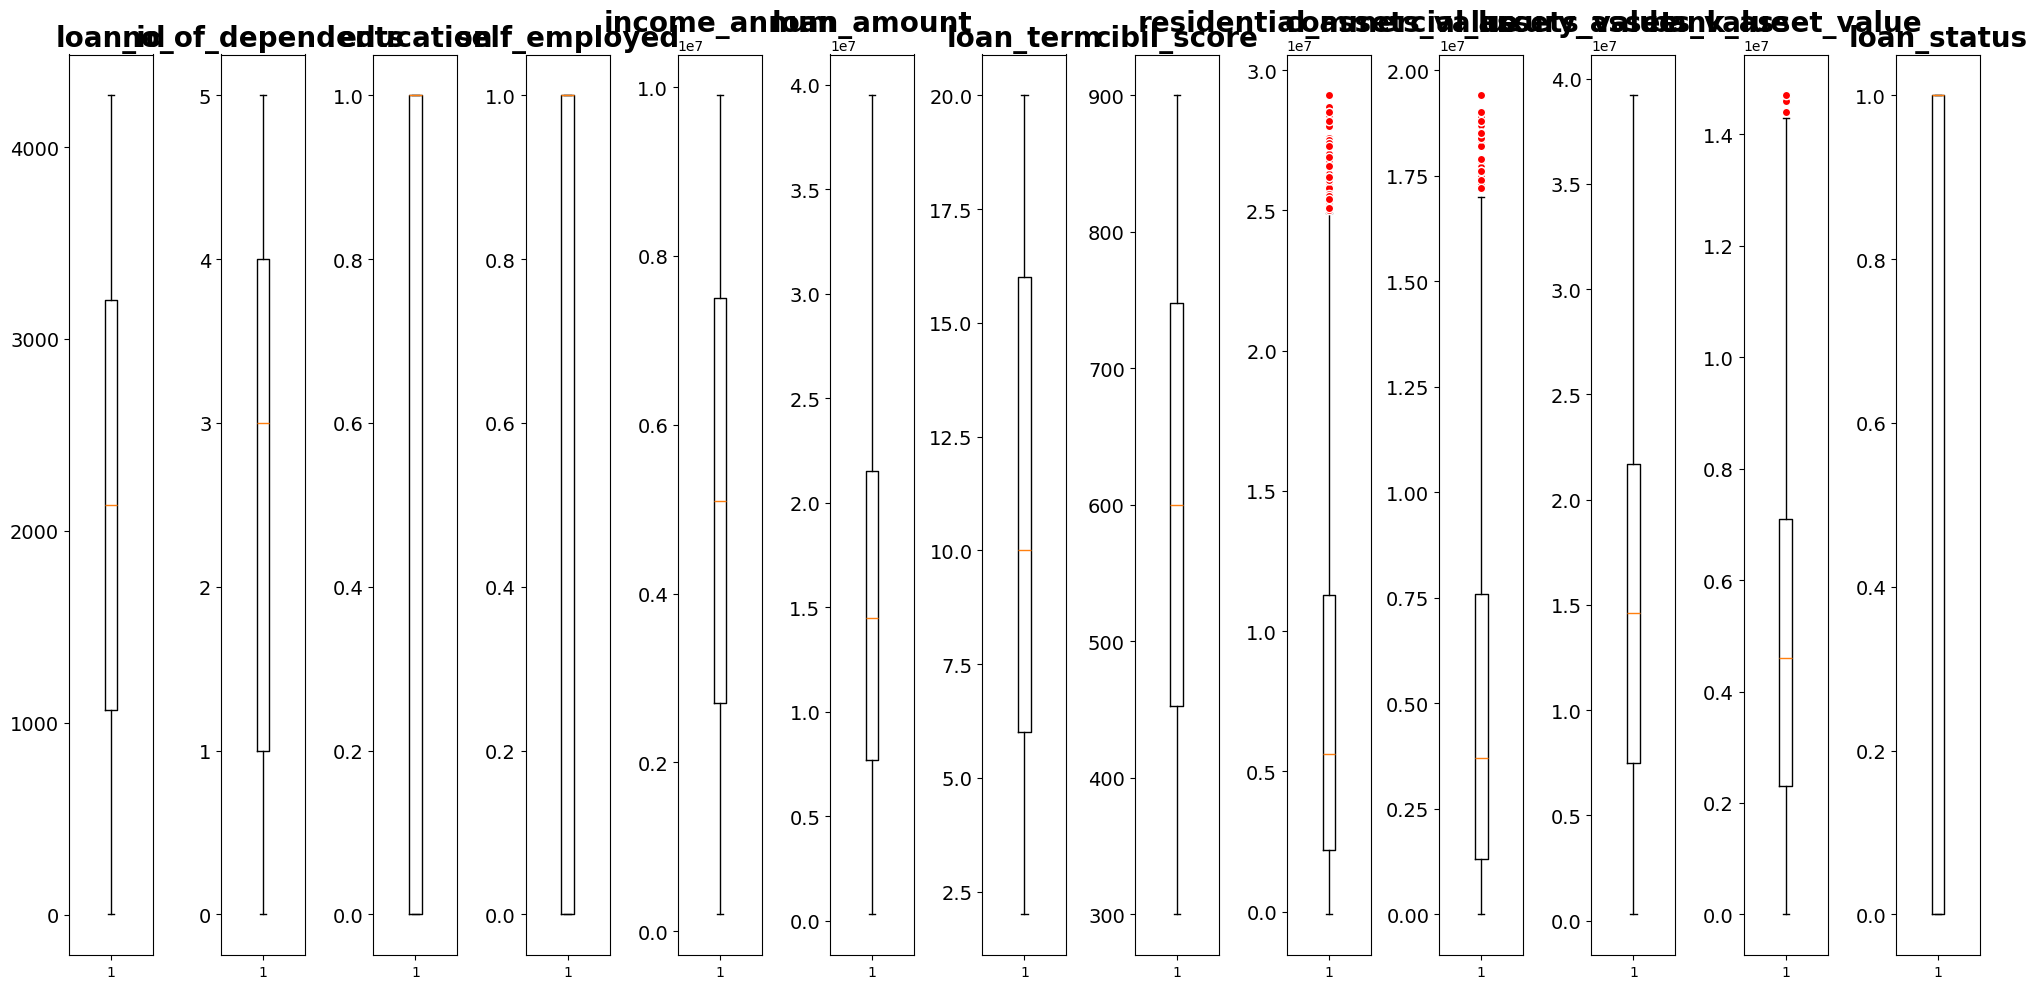

In [43]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(loan_df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(loan_df.iloc[:,i], flierprops=red_circle)
    ax.set_title(loan_df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

<Axes: >

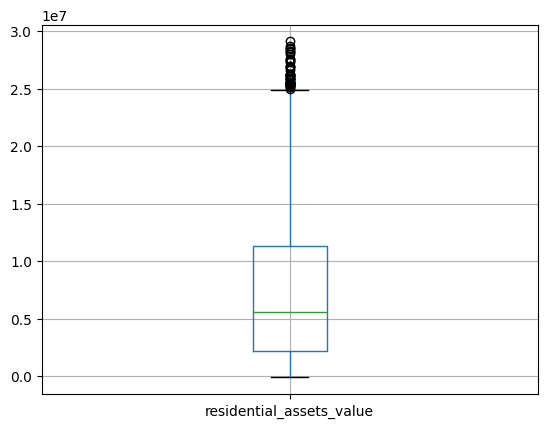

In [46]:
loan_df.boxplot(column= 'residential_assets_value')

<Axes: >

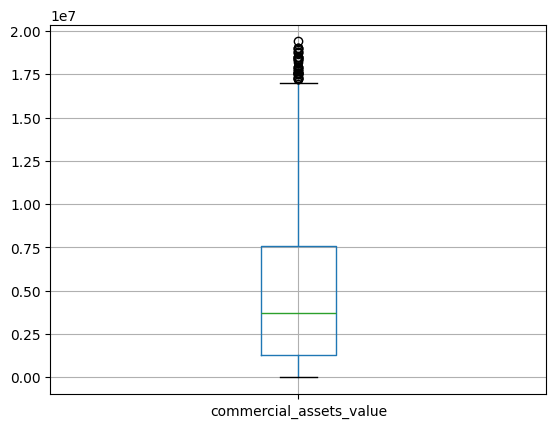

In [47]:
loan_df.boxplot(column= 'commercial_assets_value')

<Axes: >

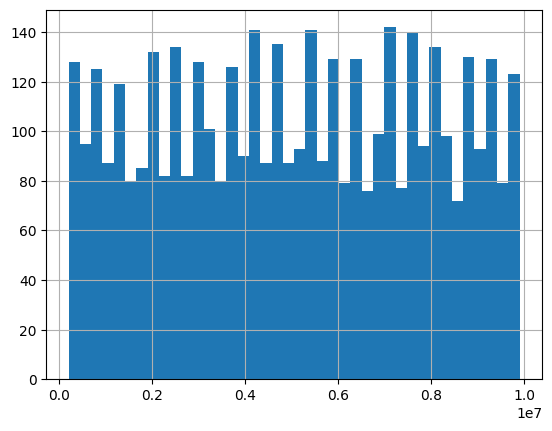

In [34]:
loan_df['income_annum'].hist(bins = 40)

<Axes: >

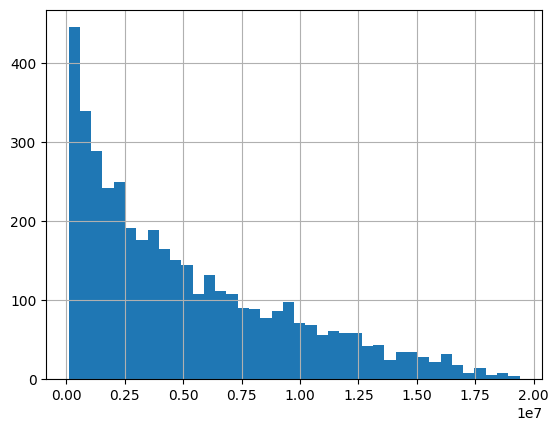

In [75]:
loan_df['commercial_assets_value'].hist(bins = 40)

<Axes: >

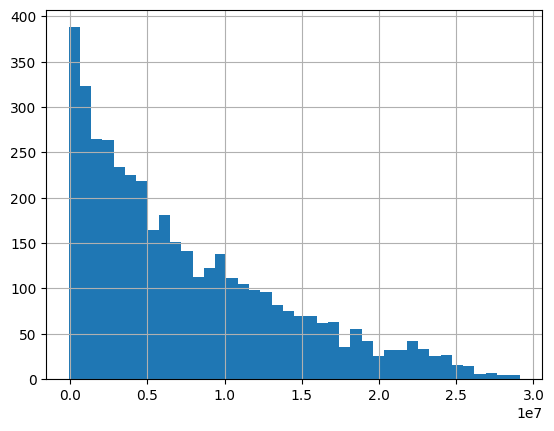

In [74]:
loan_df['residential_assets_value'].hist(bins = 40)

<Axes: >

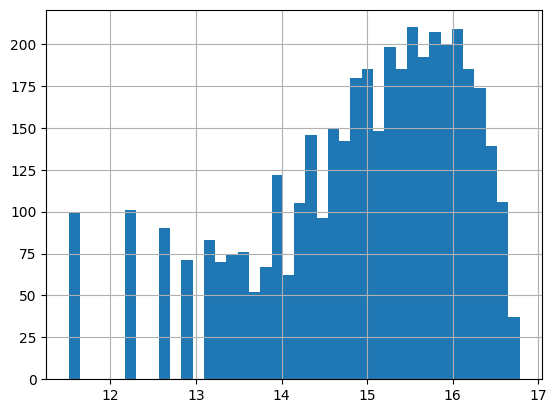

In [73]:
valid_values = loan_df['commercial_assets_value'][loan_df['commercial_assets_value'] > 0]
loan_df['commercial_assets_log'] = np.log(valid_values)
loan_df['commercial_assets_log'].hist(bins =40)

<Axes: >

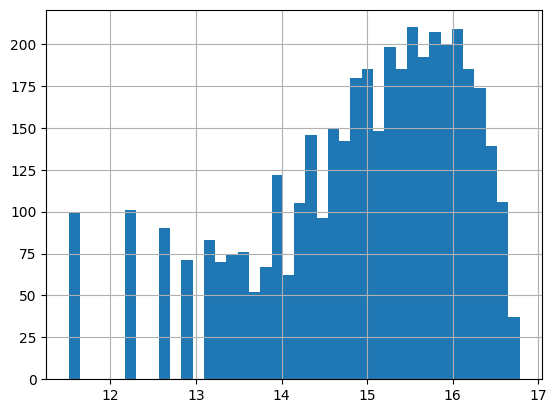

In [72]:
valid_values2 = loan_df['residential_assets_value'][loan_df['residential_assets_value'] > 0]
loan_df['residential_assets_log'] = np.log(valid_values)
loan_df['residential_assets_log'].hist(bins =40)

In [76]:
loan_df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
commercial_assets_log       0
residential_assets_log      0
dtype: int64

In [77]:
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,commercial_assets_log,residential_assets_log
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000.0,22700000,8000000,1,16.683409,16.683409
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000.0,8800000,3300000,0,14.603968,14.603968
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000.0,33300000,12800000,0,15.319588,15.319588
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000.0,23300000,7900000,0,15.009433,15.009433
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000.0,29400000,5000000,0,15.919645,15.919645


In [93]:
X = loan_df.iloc[:,np.r_[0:2,4:7,10:11,13:14]].values
Y = loan_df.iloc[:,12].values

In [94]:
X

array([[1.00000000e+00, 2.00000000e+00, 9.60000000e+06, ...,
        1.20000000e+01, 2.27000000e+07, 1.66834095e+01],
       [2.00000000e+00, 0.00000000e+00, 4.10000000e+06, ...,
        8.00000000e+00, 8.80000000e+06, 1.46039679e+01],
       [3.00000000e+00, 3.00000000e+00, 9.10000000e+06, ...,
        2.00000000e+01, 3.33000000e+07, 1.53195880e+01],
       ...,
       [4.26700000e+03, 2.00000000e+00, 6.50000000e+06, ...,
        1.80000000e+01, 1.81000000e+07, 1.63332070e+01],
       [4.26800000e+03, 1.00000000e+00, 4.10000000e+06, ...,
        8.00000000e+00, 1.41000000e+07, 1.34588356e+01],
       [4.26900000e+03, 1.00000000e+00, 9.20000000e+06, ...,
        1.00000000e+01, 3.57000000e+07, 1.62836101e+01]])

In [95]:
Y

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [96]:
!pip install scikit-learn

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [98]:
print(X_train)

[[3.99000000e+02 2.00000000e+00 8.40000000e+06 ... 1.60000000e+01
  3.35000000e+07 1.64107653e+01]
 [2.10600000e+03 0.00000000e+00 5.60000000e+06 ... 1.80000000e+01
  1.99000000e+07 1.48451300e+01]
 [4.19000000e+03 4.00000000e+00 8.60000000e+06 ... 1.20000000e+01
  2.35000000e+07 1.51505116e+01]
 ...
 [1.69600000e+03 0.00000000e+00 7.90000000e+06 ... 2.00000000e+01
  2.12000000e+07 1.65433634e+01]
 [2.68000000e+03 0.00000000e+00 3.10000000e+06 ... 1.80000000e+01
  1.16000000e+07 1.42855142e+01]
 [2.80800000e+03 2.00000000e+00 1.60000000e+06 ... 4.00000000e+00
  5.50000000e+06 1.26115378e+01]]


In [99]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [100]:
X_train

array([[3.99000000e+02, 2.00000000e+00, 8.40000000e+06, ...,
        1.60000000e+01, 3.35000000e+07, 1.64107653e+01],
       [2.10600000e+03, 0.00000000e+00, 5.60000000e+06, ...,
        1.80000000e+01, 1.99000000e+07, 1.48451300e+01],
       [4.19000000e+03, 4.00000000e+00, 8.60000000e+06, ...,
        1.20000000e+01, 2.35000000e+07, 1.51505116e+01],
       ...,
       [1.69600000e+03, 0.00000000e+00, 7.90000000e+06, ...,
        2.00000000e+01, 2.12000000e+07, 1.65433634e+01],
       [2.68000000e+03, 0.00000000e+00, 3.10000000e+06, ...,
        1.80000000e+01, 1.16000000e+07, 1.42855142e+01],
       [2.80800000e+03, 2.00000000e+00, 1.60000000e+06, ...,
        4.00000000e+00, 5.50000000e+06, 1.26115378e+01]])

In [101]:
labelencoder_Y = LabelEncoder()
Y_train = labelencoder_Y.fit_transform(Y_train)
Y_train

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [102]:
Y_train

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [103]:
X_test

array([[3.91000000e+02, 0.00000000e+00, 7.20000000e+06, ...,
        1.20000000e+01, 2.50000000e+07, 1.59073746e+01],
       [2.22300000e+03, 1.00000000e+00, 8.60000000e+06, ...,
        1.00000000e+01, 2.07000000e+07, 1.60237850e+01],
       [2.96000000e+03, 5.00000000e+00, 9.00000000e+06, ...,
        4.00000000e+00, 1.81000000e+07, 1.55202587e+01],
       ...,
       [1.28000000e+03, 0.00000000e+00, 5.50000000e+06, ...,
        1.00000000e+01, 1.19000000e+07, 1.42209757e+01],
       [3.63800000e+03, 0.00000000e+00, 5.70000000e+06, ...,
        8.00000000e+00, 1.44000000e+07, 1.57756053e+01],
       [1.81700000e+03, 5.00000000e+00, 8.00000000e+06, ...,
        2.00000000e+01, 2.60000000e+07, 1.58033849e+01]])

In [104]:
Y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [145]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [146]:
from sklearn.tree import DecisionTreeClassifier
DTClass = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
scores = []
names = []
names.append("Decision Tree")
score_decision = DTClass.fit(X_train,Y_train)

In [147]:
Y_predD = DTClass.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [148]:
from sklearn import metrics
scores.append(score_decision)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(Y_pred,Y_test)) 

The accuracy of Decision Tree is:  0.602641056422569


In [149]:
from sklearn.naive_bayes import GaussianNB
NBClass = GaussianNB()
names.append("Naive Bayes")
score_naive = NBClass.fit(X_train,Y_train)

In [150]:
Y_predN = NBClass.predict(X_test)

In [151]:
Y_predN

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [152]:
scores.append(score_naive)
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(Y_predN,Y_test)) 

The accuracy of Naive Bayes is:  0.602641056422569


In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
names.append("Logistic Regression")
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
score_logreg = accuracy_score(Y_test, Y_pred_lr)
scores.append(score_logreg)
print('The accuracy of Logistic  Regression is: ', score_logreg) 

The accuracy of Logistic  Regression is:  0.6074429771908764


In [154]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
names.append("Random Forest")

In [155]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [156]:
Y_pred_forest = clf.predict(X_test)
score = accuracy_score(Y_test, Y_pred_forest)
scores.append(score)
print('The accuracy of Random Forest is: ', score) 

The accuracy of Random Forest is:  0.602641056422569


TypeError: unsupported operand type(s) for +: 'int' and 'DecisionTreeClassifier'

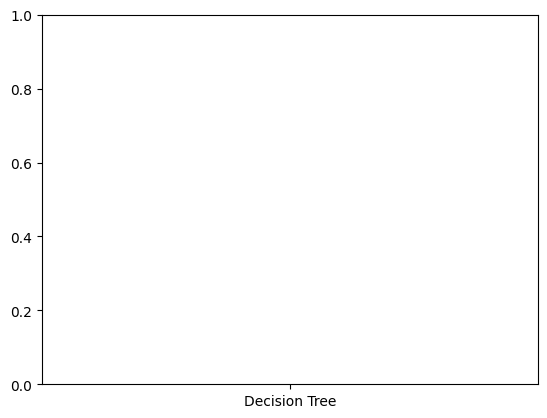

In [157]:
plt.bar(names, scores)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.show()